In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
(
    train_df[['Pclass', 'Survived']]
    .groupby(['Pclass'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [57]:
(
    train_df[['Sex', 'Survived']]
    .groupby(['Sex'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [58]:
(
    train_df[['SibSp', 'Survived']]
    .groupby(['SibSp'])
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [59]:
(
    train_df[['Parch', 'Survived']]
    .groupby(['Parch'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


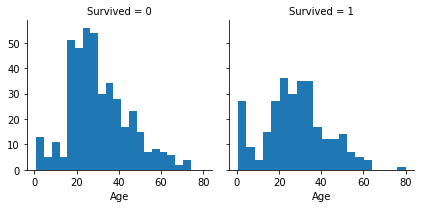

In [60]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [61]:
(
    train_df[['Pclass', 'Age']]
    .groupby(['Pclass'], as_index=False)
    .mean()
)

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


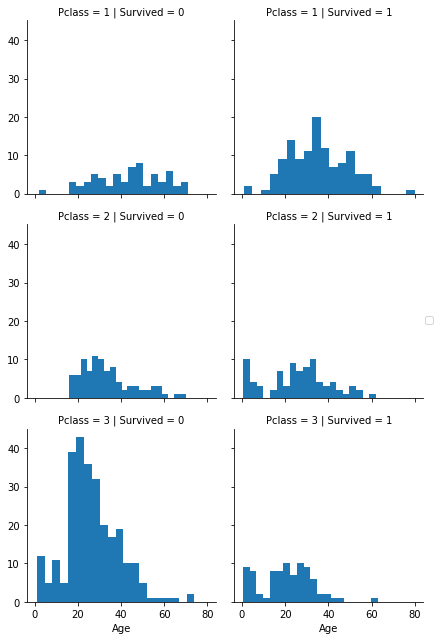

In [62]:
(
    sns.FacetGrid(train_df, col='Survived', row='Pclass')
    .map(plt.hist, 'Age', bins=20)
    .add_legend()
)

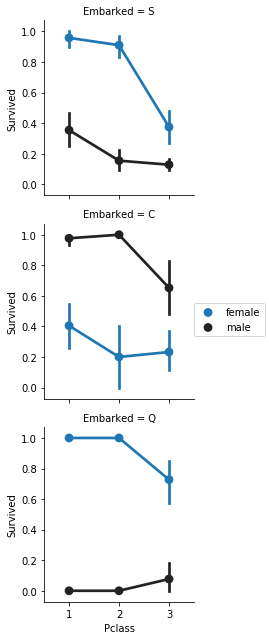

In [63]:
(
    sns.FacetGrid(train_df, row='Embarked')
    .map(
        sns.pointplot, 
        'Pclass', 'Survived', 'Sex', 
        order=train_df['Pclass'].unique().sort(),
        hue_order=train_df['Sex'].unique().sort(),
    )
    .add_legend()
)

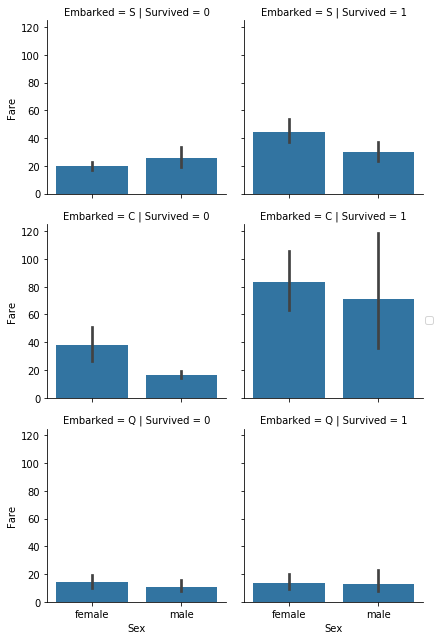

In [64]:
(
    sns.FacetGrid(train_df, row='Embarked', col='Survived')
    .map(
        sns.barplot, 
        'Sex', 'Fare',
        order=train_df['Sex'].unique().sort(),
    )
    .add_legend()
)

In [65]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train_df['cabin_letter'] = train_df['Cabin'].str[:1]

In [67]:
train_df['cabin_number'] = train_df['Cabin'].str[1:]

In [68]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_letter,cabin_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [69]:
combined = [train_df, test_df]

In [70]:
train_df = train_df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1)

In [71]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_letter,cabin_number
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN
1,1,1,female,38.0,1,0,71.2833,C,C,85
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN
3,1,1,female,35.0,1,0,53.1000,S,C,123
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN


In [79]:
(
    train_df[['cabin_letter', 'Survived']]
    .groupby(['cabin_letter'])
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Survived
cabin_letter,
D,0.757576
E,0.750000
B,0.744681
F,0.615385
C,0.593220
G,0.500000
A,0.466667
T,0.000000


In [121]:
def agg(x):
    return pd.Series({
        'survival_rate': x['Survived'].mean(),
        'count': x['Survived'].count()
    })

(
    train_df
    .fillna('XXX')
    .groupby('cabin_letter')
    .apply(agg)
    .sort_values('survival_rate', ascending=False)
)

,count,survival_rate
cabin_letter,,
D,33.0,0.757576
E,32.0,0.750000
B,47.0,0.744681
F,13.0,0.615385
C,59.0,0.593220
G,4.0,0.500000
A,15.0,0.466667
XXX,687.0,0.299854
T,1.0,0.000000


In [113]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,cabin_letter,cabin_number,sex
0,0,3,22.0,1,0,7.2500,S,NaN,NaN,0
1,1,1,38.0,1,0,71.2833,C,C,85,1
2,1,3,26.0,0,0,7.9250,S,NaN,NaN,1
3,1,1,35.0,1,0,53.1000,S,C,123,1
4,0,3,35.0,0,0,8.0500,S,NaN,NaN,0


In [114]:
train_df['sex'] = train_df['Sex'].map({'female': 1, 'male': 0}).astype(int)
train_df = train_df.drop('Sex', axis=1)

KeyError: 'Sex'

In [115]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,cabin_letter,cabin_number,sex
0,0,3,22.0,1,0,7.2500,S,NaN,NaN,0
1,1,1,38.0,1,0,71.2833,C,C,85,1
2,1,3,26.0,0,0,7.9250,S,NaN,NaN,1
3,1,1,35.0,1,0,53.1000,S,C,123,1
4,0,3,35.0,0,0,8.0500,S,NaN,NaN,0


In [116]:
train_df['cabin_letter'].fillna('XXX')

0      XXX
1        C
2      XXX
3        C
4      XXX
5      XXX
6        E
7      XXX
8      XXX
9      XXX
10       G
11       C
12     XXX
13     XXX
14     XXX
15     XXX
16     XXX
17     XXX
18     XXX
19     XXX
20     XXX
21       D
22     XXX
23       A
24     XXX
25     XXX
26     XXX
27       C
28     XXX
29     XXX
      ... 
861    XXX
862      D
863    XXX
864    XXX
865    XXX
866    XXX
867      A
868    XXX
869    XXX
870    XXX
871      D
872      B
873    XXX
874    XXX
875    XXX
876    XXX
877    XXX
878    XXX
879      C
880    XXX
881    XXX
882    XXX
883    XXX
884    XXX
885    XXX
886    XXX
887      B
888    XXX
889      C
890    XXX
Name: cabin_letter, Length: 891, dtype: object

In [140]:
(
    train_df[['Pclass', 'sex', 'Age']]
    .groupby(['Pclass', 'sex'])
    .apply(lambda x: pd.Series({
        'avg_age': x['Age'].mean().astype(int), 
        'count': x['Age'].count(),
        'count_null': x[pd.isnull(x['Age'])]['Pclass'].count(),
    }))
)

avg_age  count  count_null
Pclass sex                            
1      0         41    101          21
       1         34     85           9
2      0         30     99           9
       1         28     74           2
3      0         26    253          94
       1         21    102          42

In [152]:
train_df['estimate'] = estimate_age(train_df, train_df['Pclass'], train_df['sex'])

In [157]:
train_df['estimate'] = train_df.set_index(['Pclass', 'sex'])['Age'].dropna().median()

In [159]:
train_df = train_df.set_index(['Pclass', 'sex'])

In [161]:
train_df['x'] = train_df['Age'].mean()

In [163]:
train_df['x'].unique()

array([ 29.69911765])

In [164]:
train_df.head()

,,Survived,Age,SibSp,Parch,Fare,Embarked,cabin_letter,cabin_number,estimate,x
Pclass,sex,,,,,,,,,,
3,0,0,22.0,1,0,7.2500,S,NaN,NaN,28.0,29.699118
1,1,1,38.0,1,0,71.2833,C,C,85,28.0,29.699118
3,1,1,26.0,0,0,7.9250,S,NaN,NaN,28.0,29.699118
1,1,1,35.0,1,0,53.1000,S,C,123,28.0,29.699118
3,0,0,35.0,0,0,8.0500,S,NaN,NaN,28.0,29.699118


In [170]:
train_df['x'] = (train_df.groupby(['Pclass', 'sex'])['Age'].median())

In [171]:
train_df['x'].unique()

array([ 25. ,  35. ,  21.5,  40. ,  28. ,  30. ])

In [293]:
# read and clean data
train_df = (
    pd.read_csv('train.csv')
    .assign(
        age=lambda x: (
            x.groupby(['Pclass', 'Sex'])['Age']
            .transform(lambda x: x.fillna(x.mean()).astype(int))
    ))    
    .assign(sex=lambda x: x['Sex'].map({'female': 1, 'male': 0}))
    .assign(age_band=lambda x: pd.qcut(x.age, 5, labels=False))
    .assign(family_size=lambda x: x.SibSp + x.Parch + 1)
    .assign(is_alone=lambda x: np.where(x.family_size == 1, 1, 0))
    .assign(
        embarked=lambda x: x.Embarked.fillna(x.Embarked.mode()[0]
    ))
    .assign(
        embarked_int=lambda x: x.embarked.map(
            {p:i for i,p in enumerate(np.sort(x.embarked.unique()))}
    ))
    .assign(fare=lambda x: x.Fare.fillna(x.Fare.median()))
    .assign(fare_band=lambda x: pd.qcut(x.fare, 4, labels=False))
    .rename(columns={'Pclass': 'passenger_class'})
    .drop([
        'Age','Cabin', 'Ticket', 
        'PassengerId', 'Name', 'Sex', 
        'SibSp', 'Parch', 'family_size',
        'Embarked', 'Fare', 'fare', 'age',], 
        axis=1
    )
)

train_df.head(10)

,Survived,passenger_class,sex,age_band,is_alone,embarked,embarked_int,fare_band
0,0,3,0,1,0,S,2,0
1,1,1,1,3,0,C,0,3
2,1,3,1,1,1,S,2,1
3,1,1,1,3,0,S,2,3
4,0,3,0,3,1,S,2,1
5,0,3,0,1,1,Q,1,1
6,0,1,0,4,1,S,2,3
7,0,3,0,0,0,S,2,2
8,1,3,1,2,0,S,2,1
9,1,2,1,0,0,C,0,2
